In [32]:
import seaborn as sns
import pandas as pd

In [33]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [34]:
# sns.load_dataset('titanic')
list(sns.load_dataset('titanic'))

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [35]:
# Läs in datasetet diamonds
diamonds = sns.load_dataset('diamonds')
print(list(diamonds))
print(diamonds.info())


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


## Felsökning av felaktig data
Jag använder mig av mask för att filtrera

In [36]:
# is not in mask
display(diamonds[(diamonds['color'] == 'E')]) # 9797
display(diamonds[~(diamonds['color'] == 'E')]) # 44 143


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
...,...,...,...,...,...,...,...,...,...,...
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
# eftersom detta inte ger några svar så bevisar det att depth-kolumnen inte är uträknad från x, y, z - kolumnerna
# utan istället kommer den datan annorstädes ifrån
display(
    diamonds[
        ~(diamonds.depth ==
            2 * diamonds.depth / (diamonds.x + diamonds.y) 
            * 100)
        ]
    )

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [38]:
# till för att ta fram alla fel, inkl där depth skiljer sig för mycket mot den uträknad depth
# diamonds[

# ]

In [39]:
mask = (diamonds.x == 0) | \
        (diamonds.y == 0) | \
        (diamonds.z == 0) | \
        (diamonds.depth == 0) | \
        (diamonds.depth != (2 * diamonds.z / (diamonds.y + diamonds.x)))

problem_rows = diamonds[mask]
display(problem_rows)
print(len(problem_rows))

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


53940


In [40]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [41]:

# Den beroende variabeln är den som påverkas av allt det andra,
# i det här fallet blir det priset, eftersom det påverkas av alla 
# andra men påverkar inget

# För att bara använda numrerära värden använder jag select_dtypes()
diamonds_numeric = diamonds.select_dtypes(include=['int', 'float'])

In [42]:
# Jag skulle säga att carat är den beroende variabeln,
# eftersom den korrelerar med flest andra
display(diamonds_numeric.describe())

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [43]:
# Visa kolumner
display(list(diamonds))


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Carat, X / Y / Z och price känns som de som är mest beroende av varandra

## Tar fram medelvärde


In [44]:
# medelvärdet för den beroende variablen
display(diamonds['carat'].mean())

# Medelvärde för alla variabler
display(diamonds_numeric.mean())

np.float64(0.7979397478680014)

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [45]:
# Här tar jag fram variansen
# ddof = degrees of freedom = 0 är att jag har hela populationen
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html
diamonds_numeric.var(ddof=0)

carat    2.246825e-01
depth    2.052366e+00
table    4.992856e+00
price    1.591533e+07
x        1.258324e+00
y        1.304447e+00
z        4.980016e-01
dtype: float64

In [47]:
# Variansen är kvadraten av standardavvikelsen
# Oftast använder man inte variansen. 
# Kovariansen däremot kan användas för att jämföra mellan
# två dimensioner i samma dataset

### Tar fram standardavvikelsen

In [48]:
# Standardavvikelsen för alla int och float-kolumner
diamonds_numeric.std()

carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64

In [49]:
# Bevis för detta
display(((diamonds['carat'] - diamonds['carat'].mean())**2).sum()/(len(diamonds['carat'] - 1)))
# TODO: Visar olika värden?!

np.float64(0.22468249433037768)

In [50]:
carat_sizes = ['smallest', 'small', 'medium', 'large', 'largest']
diamond_carat_categorised = \
    pd.cut(diamonds['carat'],
    labels=carat_sizes,
    bins=len(carat_sizes)).value_counts()
print(diamond_carat_categorised)

d_c_c = pd.DataFrame(diamond_carat_categorised)
display(d_c_c)

carat
smallest    43781
small        9478
medium        667
large          11
largest         3
Name: count, dtype: int64


,count
carat,
smallest,43781
small,9478
medium,667
large,11
largest,3


<Axes: ylabel='Count'>

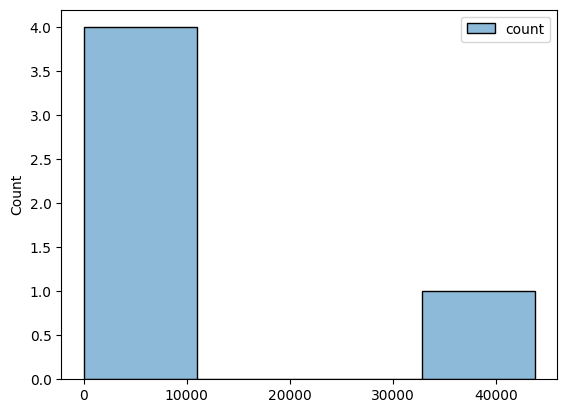

In [51]:
display(sns.histplot(d_c_c))
# x_label=carat_sizes funkar inte


### Normalfördelning
Normalfördelning är en egenskap i data<br>
Shapiro - Wilks är ett test för att se om datasetet är normalfördelat<br>
Min teori: om avståndet mellan medelvärdet och hela datasetets totala mängd värden delat på två är under 5% så är datasetet normalfördelat<br>
Whitnwy är ett annat test (?)

#### Standaardavvikelse
Kan användas OM datan är normalfördelad

53940


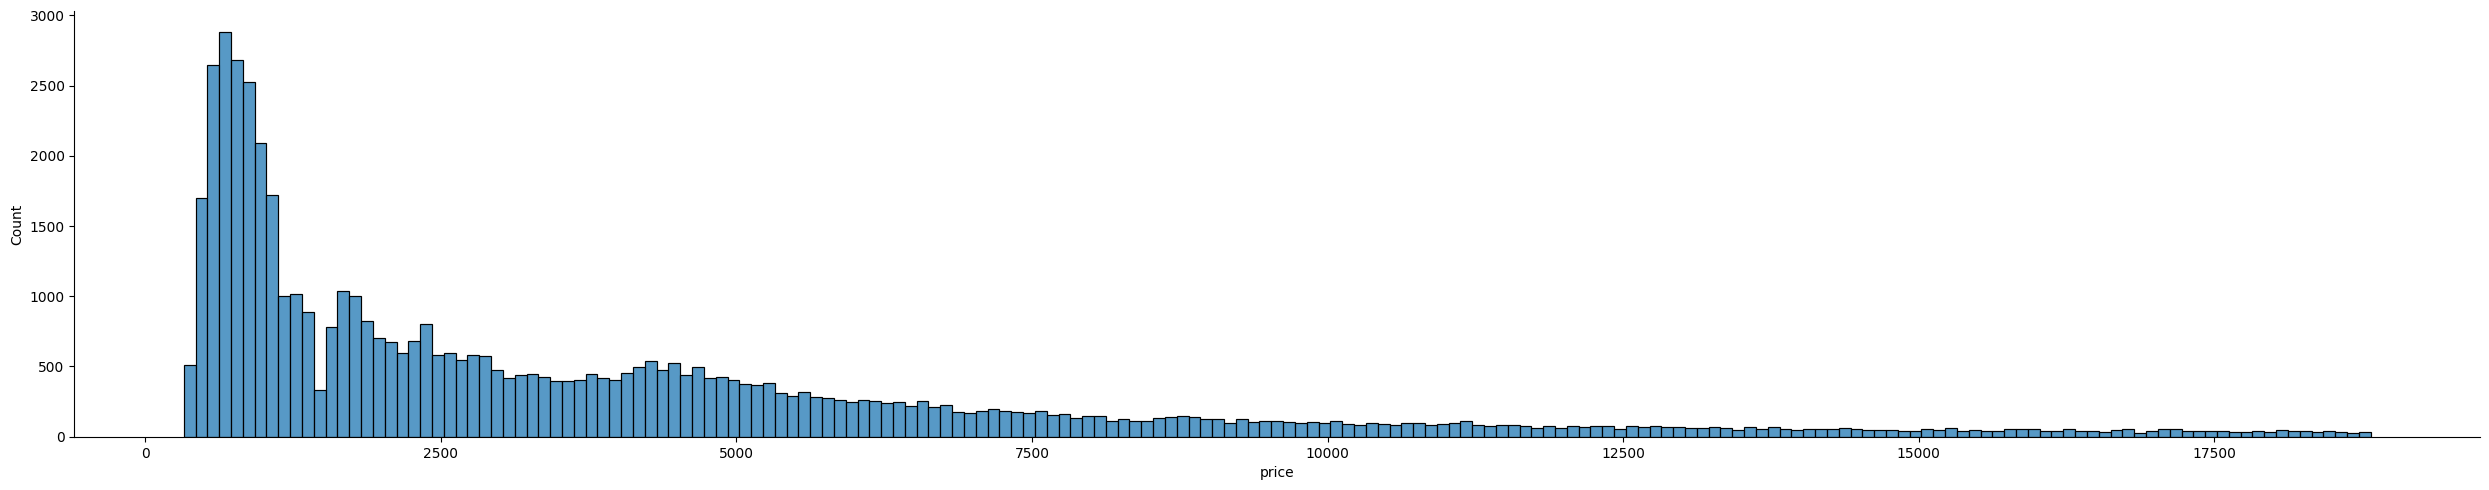

In [52]:
# Ta fram OM datan har egenskapen normalfördelning, det är inte alls säkert att datasetet ÄR det.
display(sns.displot(diamonds['price'], binwidth=100, aspect=5))
print(len(diamonds))



# Åtgärder man kan försöka för att göra för att få datan normalfördelat:
# 


In [46]:
# Bevis på variansen framtagen av .var()
d_car = diamonds['carat']

# Att ta bort en från len gör att man kommer nämre. 
# Det är vedertaget sätt att komma närmre sanningen 
# i normalfördelningen på en representativ del av populationen
# genom att subtrahera täljaren med 1
sample_variance = ((d_car - d_car.mean())**2).sum()/(len(d_car)-1)
print(
    sample_variance
) # 0.22468665982277333

# Hela populationen
variance_considering_whole_population = ((d_car - d_car.mean())**2).sum()/(len(d_car))
print(
    variance_considering_whole_population
) # 0.22468249433037768


0.22468665982277333
0.22468249433037768


In [53]:
display(sns.boxplot(sample_variance))

TypeError: object of type 'numpy.float64' has no len()

<Axes: >

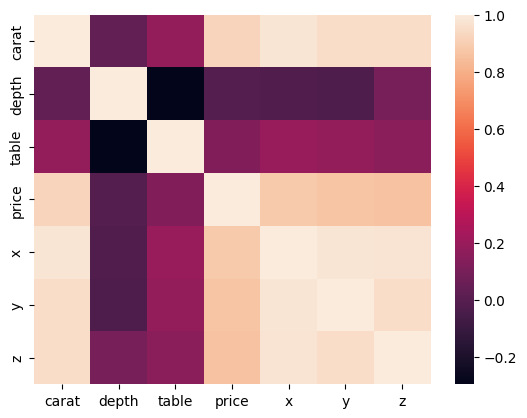

In [ ]:
# Hur korrelerar de olika rubrikerna med varandra?

# .corr() är korrelerande värden
# sns.heatmap() är seaborn heatmaps
display(sns.heatmap(diamonds_numeric.corr()))

konfidensintervall
95% av alla medelvärden ligger inom konfidensintervallet - alltså är medelvärden generellt normalfördelade